<h1><center>Yelp Dataset Exploratory Analysis</center></h1>


In this notebook, I will be performing all the exploratory analysis on the Yelp dataset. There are visualizations on the analysis of the data as well as various maps to show the distribution of reviews across the continents. It is further analyzed into the sections where the review count is maximum (Las Vegas, Nevada)

Dataset

This project uses the Yelp Open Dataset:https://www.yelp.com/dataset/download, which includes 5 files:

business: Contains business data including location data, attributes, and categories.<br><br>
review: Contains full review text data including the user_id that wrote the review and the business_id the review is written for.<br><br>
user: User data including the user's friend mapping and all the metadata associated with the user.<br><br>
checkin: Checkins on a business.<br><br>
tip: Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.<br>

For the purpose of my analysis, I am using the business, review, checkin dataset.

<b>Things done:</b>

•	Read Review Dataset in chunks<br>
•	Plot for distribution of Reviews across stars<br>
•	Read/Cleaned Business Dataset<br>
•	Read/Calculated Total/Merged Checkin Dataset<br>
•	Split/Count distinct categories<br>
•	Plot to show maximum category business<br>
•	World map to show where the restaurant businesses are scattered<br>
•	Closer view of North America and Europe map for restaurant businesses<br>
•	Plot for Businesses with maximum Checkin counts<br>
•	Plot for Businesses with maximum Review counts<br>
•	Pie Chart of States with the maximum number of Checkins<br>
•	Map - Arcgisimage of Nevada<br>
•	Map - with inset function for Nevada<br>
•	Folium Map - With Headmap over time for review counts for Las Vegas<br>
•	States having average star ratings greater than 3 and less than 3<br>




In [44]:
#Import all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import matplotlib.pyplot as plt
#This will allow us to plot inside the notebook
%matplotlib inline
import spacy
import gc #Garbage collector
from collections import Counter #Counting commong words
import seaborn as sns #Visualization 
from wordcloud import WordCloud, STOPWORDS #Module for making wordcloud in python
import re #Regular expression
import string #For finding punctuation in text
import nltk #For preprocessing text
from textblob import TextBlob
#Import plotly for visualization
import plotly
import plotly.offline as py #Make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

The Reviews Dataset is very large in size because of which reading it at a stretch will be very time consuming. Here, I have defined the chunck size as 1,00,000 and will be reading the data in chunks. This results in a TextFileReader object which is further iterated in a for loop to append it to the Data Frame 'df'. Dataframe 'df' is further assigned to the dataframe 'review' after checking for any null values

In [46]:
#Specify the Chunk Size
process_chunksize = 100000

#Read the File for the Year 2010
review = pd.read_csv("/Users/aagnakatrodia/Desktop/YELP/yelp_dataset/yelp_review.csv", chunksize=process_chunksize)
print(review)


In [47]:
#Initialize Variables
df = pd.DataFrame()
start = 0
end = 1

for mainDF_chunk in review:
    First = start * process_chunksize
    Last = end * process_chunksize
    print('New group from review, lines ' + str(First) + ' to ' + str(Last))

    ## Cleaning main-------------------------------------------------------------

    #Keep appending it to DF
    df = df.append(mainDF_chunk, sort=True)

    start += 1
    end += 1

New group from review, lines 0 to 100000
New group from review, lines 100000 to 200000
New group from review, lines 200000 to 300000
New group from review, lines 300000 to 400000
New group from review, lines 400000 to 500000
New group from review, lines 500000 to 600000
New group from review, lines 600000 to 700000
New group from review, lines 700000 to 800000
New group from review, lines 800000 to 900000
New group from review, lines 900000 to 1000000
New group from review, lines 1000000 to 1100000
New group from review, lines 1100000 to 1200000
New group from review, lines 1200000 to 1300000
New group from review, lines 1300000 to 1400000
New group from review, lines 1400000 to 1500000
New group from review, lines 1500000 to 1600000
New group from review, lines 1600000 to 1700000
New group from review, lines 1700000 to 1800000
New group from review, lines 1800000 to 1900000
New group from review, lines 1900000 to 2000000
New group from review, lines 2000000 to 2100000
New group from r

In [5]:
#Print the first 5 rows of the reviews dataset
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw
1,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw
2,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw
3,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw
4,s2I_Ni76bjJNK9yG60iD-Q,0,2016-05-28,0,L_9BTb55X0GDtThi6GlZ6w,4,Had their chocolate almond croissant and it wa...,0,bv2nCi5Qv5vroFiqKGopiw


In [6]:
#Check for Null values
df.isnull().any()

business_id    False
cool           False
date           False
funny          False
review_id      False
stars          False
text           False
useful         False
user_id        False
dtype: bool

In [48]:
reviews=df

In [53]:
reviews.stars.unique()

array([5, 4, 3, 1, 2])

The below graph shows the distribution of reviews across stars (1,2,3,4,5)

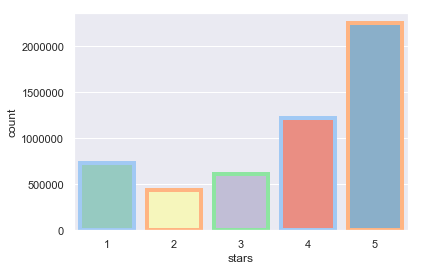

In [50]:
#Let's calculate the number of reviews per stars
sns.set(style="darkgrid")
stars = sns.countplot(reviews.stars, palette='Set3', linewidth=4, edgecolor=sns.color_palette("pastel", 3))


Next, I will be reading the Business Dataset which contains details about all the businesses in Yelp which has reviews and checkins. You can see the columns in the dataset below. Business dataset contains 1,74,567 records. This is further filtered to include only the businesses which are open (is_open=1). The data is further cleaned to remove the states which are invalid (3,30,01,6).

In [8]:
#Read the Business Dataset
business = pd.read_csv("/Users/aagnakatrodia/Desktop/YELP/yelp_dataset/yelp_business.csv")
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [9]:
#Total number of Businesses
business.business_id.count()

174567

In [10]:
#Removing businesses that are closed
business=business.drop(business[(business['is_open'] == 0)].index)
print(business.business_id.count())

146702


In [11]:
#Removing businesses from states that are not valid: 3,6,30,1
business=business.drop(business[(business['state'] == '3') | (business['state'] == '01') | (business['state'] == '30') | (business['state'] == '6')].index)
print(business.business_id.count())

146687


I am reading checkin dataset next. The 'checkin' column gives the number of checkins at a particular day and hour for a particular business. I have aggregated (sum) of the checkins by the business_id to give the total number of checkins per business over the period of time. This will be helpful to perform exploratory analysis. I am also merging the total checkin dataset with the business dataset.

In [13]:
#Read the Checkin Dataset
checkin = pd.read_csv("/Users/aagnakatrodia/Desktop/YELP/yelp_dataset/yelp_checkin.csv")
checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [14]:
#Calculate the total number of checkins per business
totcheckin=checkin.groupby('business_id').agg({'checkins':np.sum})

totcheckin.head()

,checkins
business_id,
--6MefnULPED_I942VcFNA,139
--7zmmkVg-IMGaXbuVd0SQ,153
--8LPVSo5i0Oo61X01sV9A,1
--9QQLMTbFzLJ_oT-ON3Xw,33
--9e1ONYQuAa-CB_Rrw7Tw,2568


Now that I have read all the needed datasets, to perform further exploratory analysis on the data, I will merge the business dataset with the total checkins calculated above (totcheckin)

In [16]:
#Merge business & checkin data on business_id. 
cb = pd.merge(business, totcheckin, on='business_id', how='left')
cb.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,checkins
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,39.0
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,15.0
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...,6.0
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,263.0
4,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants,1.0


In [17]:
cb.business_id.count()

146687

In [18]:
#Dropping the unwanted columns - We will work with 'latitude' and 'longitude' so don't need 'neighborhood' and 'address'
cb = cb.drop(['neighborhood','address'],axis=1)
cb.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,checkins
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,39.0
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,15.0
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...,6.0
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,263.0
4,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants,1.0


As we can see here, the 'categories' column does not contain a single category. It is a mix of different related categories. To see which particular category is the most prevalent, we will split the categories and calculate the sum of each of these categories

In [20]:
#Splitting the categories
cat = set()
for astr in cb['categories'][cb['categories'].notnull()].str.split(';'):
    cat = list(set().union(astr, cat))
print(cat)

['Furniture Assembly', 'Pita', 'Arabian', 'Hot Tub & Pool', 'Video/Film Production', 'Chiropractors', 'Taxidermy', 'Bookkeepers', 'Assisted Living Facilities', 'Lounges', 'Backshop', 'Town Car Service', 'Speech Therapists', 'Eastern European', 'Cajun/Creole', 'Hair Stylists', 'Clock Repair', 'Mediterranean', 'Landmarks & Historical Buildings', 'Donairs', 'Driving Schools', 'Supper Clubs', 'Kitchen Incubators', 'Mini Golf', 'Opera & Ballet', 'Educational Services', 'Pilates', 'Bars', 'Christmas Markets', 'Real Estate', 'Filipino', 'Chinese Martial Arts', 'Emergency Rooms', 'Teacher Supplies', 'Knitting Supplies', 'Audiologist', 'Senegalese', 'Car Inspectors', 'Television Service Providers', 'Transportation', 'Registration Services', 'Nail Salons', 'Hospitals', 'Piano Stores', 'Delicatessen', 'Serbo Croatian', 'Argentine', 'American (New)', 'Motorcycle Rental', 'Mobile Home Dealers', 'Pediatric Dentists', 'Carpet Installation', 'Dim Sum', 'Arts & Entertainment', 'Middle Schools & High Sc

In [21]:
#Calculating the category counts
c_count = []

for a in cat:
    c_count.append([a,cb['categories'].str.contains(a).sum()])
print(c_count)

[['Furniture Assembly', 38], ['Pita', 2], ['Arabian', 46], ['Hot Tub & Pool', 330], ['Video/Film Production', 170], ['Chiropractors', 1104], ['Taxidermy', 2], ['Bookkeepers', 46], ['Assisted Living Facilities', 54], ['Lounges', 970], ['Backshop', 4], ['Town Car Service', 23], ['Speech Therapists', 43], ['Eastern European', 2], ['Cajun/Creole', 157], ['Hair Stylists', 1648], ['Clock Repair', 16], ['Mediterranean', 1136], ['Landmarks & Historical Buildings', 269], ['Donairs', 17], ['Driving Schools', 109], ['Supper Clubs', 5], ['Kitchen Incubators', 2], ['Mini Golf', 64], ['Opera & Ballet', 30], ['Educational Services', 195], ['Pilates', 262], ['Bars', 10477], ['Christmas Markets', 9], ['Real Estate', 4479], ['Filipino', 128], ['Chinese Martial Arts', 13], ['Emergency Rooms', 42], ['Teacher Supplies', 5], ['Knitting Supplies', 97], ['Audiologist', 62], ['Senegalese', 1], ['Car Inspectors', 13], ['Television Service Providers', 164], ['Transportation', 946], ['Registration Services', 67],

In [22]:
category = pd.DataFrame(c_count)
category.columns = ['Category','Count']
category=category.sort_values(by='Count',ascending=False)
category.head()

,Category,Count
192,Restaurants,40381
1216,Food,25641
58,Shopping,24017
868,Home Services,15448
978,Beauty & Spas,14852


Below plot is to show the maximum category businesses. As, we can see, the maximum category of business is Restaurant, followed by Food and Shopping.

Text(0.5, 1.0, 'Maximum Business Categories')

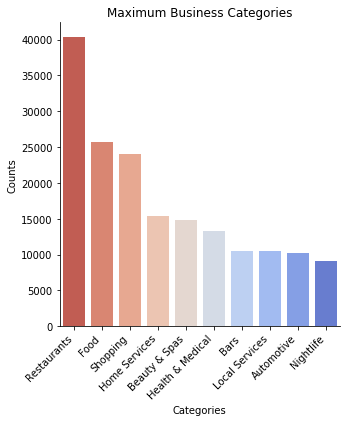

In [23]:
cat10 = category.head(10)

catbusi = sns.catplot(x="Category",y="Count",kind="bar",data=cat10,palette='coolwarm_r')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)

# naming the x-axis 
plt.xlabel('Categories') 
# naming the y-axis 
plt.ylabel('Counts') 
# plot title 
plt.title('Maximum Business Categories') 


Since a category consists of more than one keyword, these counts are overlapped. For further analysis, we will only consider businesses which are Restaurants, Nightlife, Bars or Related to Food. We are picking the restaurant industry for futher analysis

In [24]:
rest = cb[cb['categories'].str.contains("Restaurants|Food|Nightlife|Bars")]
print(rest.business_id.count())

55397


In [25]:
rest.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,checkins
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,263.0
4,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants,1.0
7,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food,15.0
10,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",Markham,ON,L3P 1X3,43.875177,-79.260153,4.0,38,1,Bakeries;Bagels;Food,83.0
12,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional),28.0


Let us see where these restaurants are located on the world map. I am using Basemap here with the 'hammer' projection to display the map. The background of the map is filled by etopo(). The red spots are the restaurant businesses included in the Business Dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


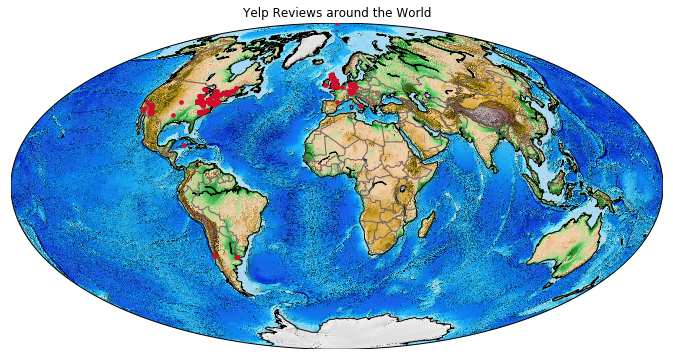

In [26]:
#basic basemap of the world
plt.figure(1, figsize=(15,6))
# use ortho projection for the globe type version
m1=Basemap(projection='hammer',lon_0=0,resolution='c')
m1.drawcoastlines()
m1.etopo()

# Draw the boundaries of the countires
m1.drawcountries(linewidth=1, color="#695d5d")

#Add the scatter points to indicate the locations of the businesses
mxy = m1(rest["longitude"].tolist(), rest["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#ce0e2d", lw=3, alpha=1, zorder=5)
plt.title("Yelp Reviews around the World")
plt.show()

As we can see from the above map, most of the reviews for the restuarants are concentrated around the regions in  North America and Europe. Let's analyze them in greater detail! Again, I am using Basemap with bluemarble() for the background. The yellow spots are the restaurant businesses in the North America And Europe region

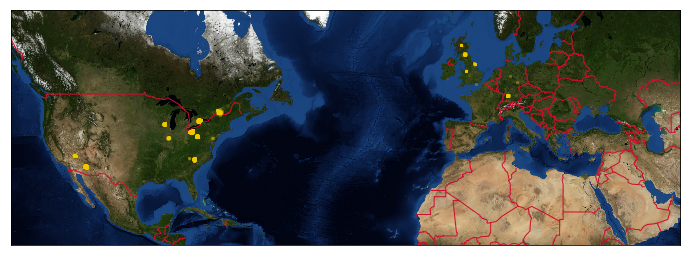

In [27]:
#Sample it down to only the North America and Europe regions
lon_min, lon_max = -133.459654, 58.613345
lat_min, lat_max = 12.895679,62.456632

#Create the selector
idx_NA = (rest["longitude"]>lon_min) &\
            (rest["longitude"]<lon_max) &\
            (rest["latitude"]>lat_min) &\
            (rest["latitude"]<lat_max)
#Apply the selector to subset
NA_business=rest[idx_NA]

#Initiate the figure
plt.figure(figsize=(12,8))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lon_0=35,lat_0=0,
             resolution = 'l'
             )

m2.drawcountries(linewidth=1, color="#ce0e2d") 
m2.bluemarble()


#Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=10, c="#ffdb00", lw=0, alpha=0.05, zorder=5)



Businesses with Maximum Check-in counts

In [28]:
maxcheck=rest.sort_values(by=['checkins'],ascending=False).head(10)
maxcheck

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,checkins
101271,IZivKqtHyz4-ts8KsnvMrA,"""Kung Fu Tea""",Las Vegas,NV,89146,36.127020,-115.209644,4.5,1041,1,Taiwanese;Food;Juice Bars & Smoothies;Coffee &...,32393.0
8857,El4FC8jcawUVgw_0EIcbaQ,"""MGM Grand Hotel""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...,28272.0
100603,RESDUcs7fIiihp38-d6_6g,"""Bacchanal Buffet""",Las Vegas,NV,89109,36.116113,-115.176222,4.0,7009,1,Sandwiches;Buffets;Restaurants;Breakfast & Bru...,26378.0
117293,DkYS3arLOhA8si5uUEmHOw,"""Earl of Sandwich""",Las Vegas,NV,89109,36.108228,-115.171869,4.5,4869,1,Caterers;Sandwiches;Restaurants;Food Delivery ...,25158.0
129942,t-o_Sraneime4DDhWrQRBA,"""Wynn Las Vegas""",Las Vegas,NV,89109,36.127684,-115.165905,4.0,2441,1,Casinos;Event Planning & Services;Nightlife;Re...,21160.0
58748,K7lWdNUhCbcnEvI0NhGewg,"""Wicked Spoon""",Las Vegas,NV,89109,36.109538,-115.176170,3.5,5950,1,Buffets;Breakfast & Brunch;Restaurants,20990.0
82167,4JNXUYY8wbaaDmk3BPzlWw,"""Mon Ami Gabi""",Las Vegas,NV,89109,36.112827,-115.172581,4.0,7361,1,French;Steakhouses;Restaurants;Breakfast & Brunch,19138.0
21066,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",Las Vegas,NV,89109,36.112372,-115.173064,4.0,3741,1,Pizza;Restaurants,16566.0
140275,yfxDa8RFOvJPQh0rNtakHA,"""Pho Kim Long""",Las Vegas,NV,89102,36.126194,-115.193445,3.5,2594,1,Vietnamese;Chinese;Restaurants,16322.0
63665,GHS1rVjO-RMcRB6WJLpCDQ,"""Las Vegas North Premium Outlets""",Las Vegas,NV,89106,36.163651,-115.157749,4.0,882,1,Shopping Centers;Restaurants;Fashion;Outlet St...,16026.0


Text(0.5, 1.0, 'Business with Maximum Checkins')

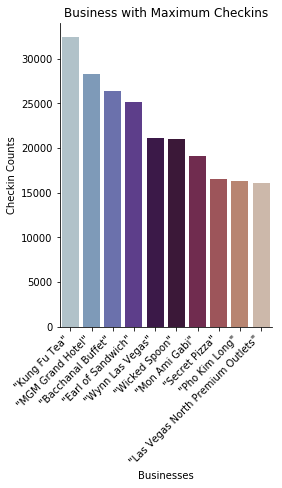

In [29]:
mcheckplot = sns.catplot(x="name",y="checkins",kind="bar",data=maxcheck,palette='twilight')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)

# naming the x-axis 
plt.xlabel('Businesses') 
# naming the y-axis 
plt.ylabel('Checkin Counts') 
# plot title 
plt.title('Business with Maximum Checkins') 

Businesses with Maximum Number of Reviews written

In [30]:
maxrev=rest.sort_values(by=['review_count'],ascending=False).head(10)
maxrev

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,checkins
82167,4JNXUYY8wbaaDmk3BPzlWw,"""Mon Ami Gabi""",Las Vegas,NV,89109,36.112827,-115.172581,4.0,7361,1,French;Steakhouses;Restaurants;Breakfast & Brunch,19138.0
100603,RESDUcs7fIiihp38-d6_6g,"""Bacchanal Buffet""",Las Vegas,NV,89109,36.116113,-115.176222,4.0,7009,1,Sandwiches;Buffets;Restaurants;Breakfast & Bru...,26378.0
58748,K7lWdNUhCbcnEvI0NhGewg,"""Wicked Spoon""",Las Vegas,NV,89109,36.109538,-115.176170,3.5,5950,1,Buffets;Breakfast & Brunch;Restaurants,20990.0
117293,DkYS3arLOhA8si5uUEmHOw,"""Earl of Sandwich""",Las Vegas,NV,89109,36.108228,-115.171869,4.5,4869,1,Caterers;Sandwiches;Restaurants;Food Delivery ...,25158.0
16102,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,4774,1,American (New);Restaurants;Breakfast & Brunch,13328.0
67650,2weQS-RnoOBhb1KsHKyoSQ,"""The Buffet""",Las Vegas,NV,89109,36.126887,-115.165590,3.5,4018,1,Buffets;Restaurants,8744.0
104382,KskYqH1Bi7Z_61pH6Om8pg,"""Lotus of Siam""",Las Vegas,NV,89104,36.143450,-115.142780,4.0,3964,1,Car Dealers;Thai;Automotive;Seafood;Bars;Wine ...,12210.0
78035,ujHiaprwCQ5ewziu0Vi9rw,"""The Buffet at Bellagio""",Las Vegas,NV,89109,36.113220,-115.176890,3.5,3838,1,Buffets;Restaurants;American (New),8278.0
21066,iCQpiavjjPzJ5_3gPD5Ebg,"""Secret Pizza""",Las Vegas,NV,89109,36.112372,-115.173064,4.0,3741,1,Pizza;Restaurants,16566.0
5674,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...,9728.0


Text(0.5, 1.0, 'Business with Maximum Review counts')

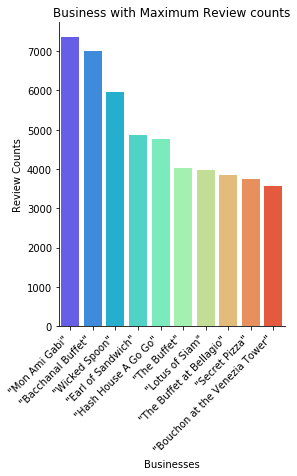

In [31]:
mrevplot= sns.catplot(x="name",y="review_count",kind="bar",data=maxrev,palette='rainbow')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)

# naming the x-axis 
plt.xlabel('Businesses') 
# naming the y-axis 
plt.ylabel('Review Counts') 
# plot title 
plt.title('Business with Maximum Review counts') 

States with the most number of Checkins

In [32]:
statecheck=rest.groupby('state').agg({'checkins':np.sum})
maxstate=pd.DataFrame(statecheck.sort_values(by=['checkins'],ascending=False).head(10))
maxstate.shape


(10, 1)

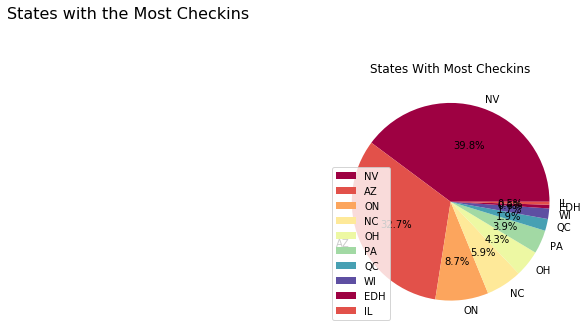

In [33]:
#Creating a pie chart in matplotlib
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt
%matplotlib inline

# Make square figures and axes
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='States With Most Checkins')
Source_pie = plt.pie(maxstate.checkins, labels=maxstate.index, autopct='%1.1f%%',  colors=colors)
plt.suptitle('States with the Most Checkins', fontsize=16)
plt.legend(maxstate.index,loc="lower left")





As we can see from the above pie chard, Nevada has the maximum number of checkins. In the below map, I am analyzing the Nevada region in further detail. I am using arcgisimage with the service 'NatGeo_World_Map' to show the Nevada region. As we can see, most of the restaurant businesses are concentrated across the Las Vegas region.

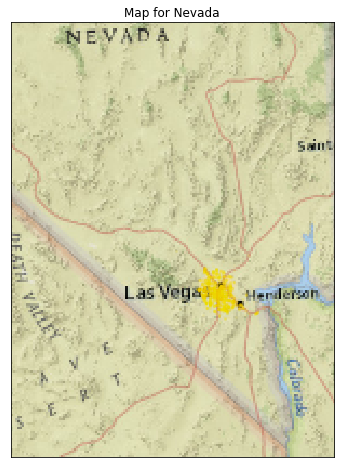

In [34]:
#Test arcgisimage method for retrieving images from web map servers.

plt.figure(figsize=(6,8))
epsg = 3423; lon1 = -117; lat1 = 35; lon2 = -114.05; lat2 =38
m=Basemap(epsg=epsg,resolution='i',llcrnrlon=lon1,llcrnrlat=lat1,urcrnrlon=lon2,urcrnrlat=lat2)

#Specify a service for arcgisimage
m.arcgisimage(service='NatGeo_World_Map',verbose=False,xpixels=150,interpolation='bicubic')

# Plot the data
mxy = m(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=8, c="#ffdb00", lw=0, alpha=0.05, zorder=5)


plt.title('Map for Nevada')

plt.show()

For this map, I am using the mark_inset function to give us a view of Las Vegas in a separate map inside the previous one

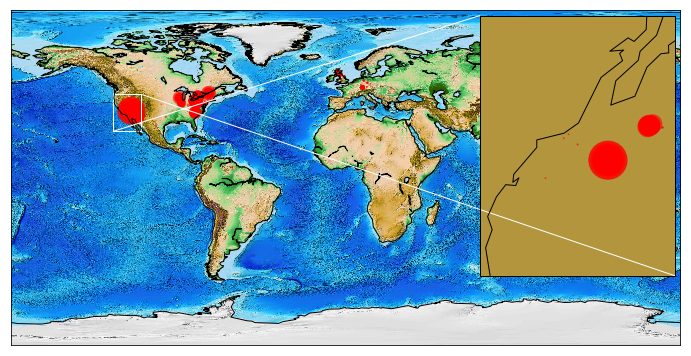

In [35]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

map = Basemap(projection='cyl', lat_0=0, lon_0=0)
map.etopo()
map.drawcoastlines()

lons = np.array(NA_business["longitude"]) 
lats = np.array(NA_business["latitude"]) 

x, y = map(lons, lats)
map.scatter(x, y, s=NA_business["review_count"]/10, c='r', alpha=0.5)
axins = zoomed_inset_axes(ax, 7, loc=1) 
axins.set_xlim(-20, 0) 
axins.set_ylim(3, 18)
plt.xticks(visible=False) 
plt.yticks(visible=False)


lon_min, lon_max = -125, -110
lat_min, lat_max = 45,25



map2 = Basemap(llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max) 
map2.drawmapboundary(fill_color='#b2953c') 
map2.fillcontinents(color='green', lake_color='blue', zorder=0)
map2.drawcoastlines()
map2.drawcountries()
map2.drawstates(linewidth=0.5)

map2.scatter(x, y, s=NA_business["review_count"]/5, c='r', alpha=0.5) 
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="1") 
plt.show()

Here, I am creating a heatmap over the time for the review_counts in the business/restaurant dataset. I will be using Folium Map with the plugin HeatMapWithTime

In [40]:
#Pick a random point inside vegas
lat = 36.169900
lon = -115.139800
#Add the min max for lon and lat
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#Create a subset for vegas
data_vegas=rest[(rest["longitude"]>lon_min) &\
                    (rest["longitude"]<lon_max) &\
                    (rest["latitude"]>lat_min) &\
                    (rest["latitude"]<lat_max)]

data=[]
#Rearrange the data for the format needed for folium
stars_list=list(rest['review_count'].unique())
for star in stars_list:
    subset=data_vegas[data_vegas['review_count']==star]
    data.append(subset[['latitude','longitude']].values.tolist())

#Initialize at vegas
lat = 36.169900
lon = -115.139800
zoom_start=11

  
#Create an empty map zoomed in on LAs Vegas
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)


#Improvising the Heatmap with time plugin to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,max_opacity=0.8,auto_play=True,display_index=True,radius=7)
hm.add_to(m)
m



The States having average star rating greater than 3 and the States having average star rating less than 3

In [42]:
statestar =rest.groupby('state').agg({'stars':np.mean})
ss = pd.DataFrame(statestar)
ss.reset_index(level=0, inplace=True)
print(ss)

   state     stars
0    ABE  4.000000
1     AK  2.500000
2     AZ  3.467938
3      B  2.500000
4     BW  3.775493
5     BY  3.833333
6      C  3.521739
7     CA  4.500000
8    CHE  3.596591
9    CMA  2.500000
10    CO  3.750000
11   EDH  3.798667
12   ELN  3.725806
13   ESX  4.142857
14   FIF  3.760000
15   FLN  4.500000
16   GLG  4.000000
17   HLD  3.583333
18    HU  4.500000
19    IL  3.423333
20    IN  2.500000
21   KHL  3.500000
22   MLN  3.740385
23    NC  3.472208
24    NI  3.714286
25   NLK  3.500000
26   NTH  3.500000
27    NV  3.481644
28    NY  3.333333
29   NYK  3.613636
30    OH  3.511153
31    ON  3.431367
32    PA  3.571485
33   PKN  3.500000
34    QC  3.716140
35   RCC  5.000000
36    SC  3.441589
37   SCB  3.500000
38    ST  4.100000
39    VA  4.000000
40    VS  4.083333
41   WHT  3.000000
42    WI  3.544805
43   WLN  3.318182
44   XGL  4.000000
45   ZET  3.500000


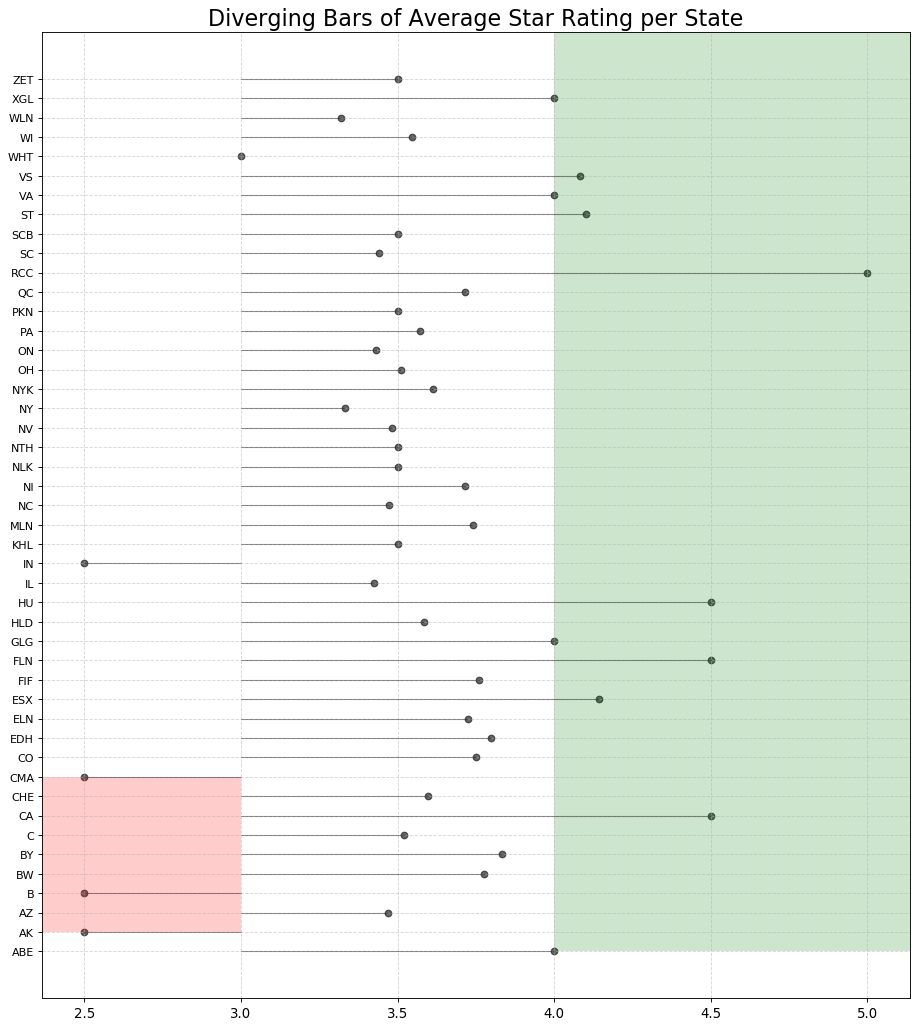

In [43]:
# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=ss.index, xmin=3, xmax=ss.stars, alpha=0.4, linewidth=1)
plt.scatter(ss.stars, ss.index, alpha=0.6, color='black')
plt.yticks(ss.index, ss.state)
plt.xticks(fontsize=12)


# Add Patches
p1 = patches.Rectangle((1.5, 1), width=1.5, height=8, alpha=.2, facecolor='red')
p2 = patches.Rectangle((4,0), width=2, height=50, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Average Star Rating per State', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()